IPL'24_EDA by Sadiya Sajid

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2024-matches/ipl2024 Matches.csv


# DATA LOADING


## LOAD DATASET & LIBRARIES

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
df= pd.read_csv("/kaggle/input/ipl-2024-matches/ipl2024 Matches.csv")
df.head(5)

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah


In [23]:
df.shape

(74, 14)

In [24]:
df.describe()

,id,first_score,first_wkts,second_score,second_wkts
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,180.554054,6.148649,169.054054,5.783784
std,21.505813,51.855474,2.469998,47.651386,2.934305
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19.250000,162.250000,4.250000,145.250000,3.250000
50%,37.500000,182.500000,6.000000,173.500000,6.000000
75%,55.750000,208.000000,8.000000,198.250000,8.000000
max,74.000000,277.000000,10.000000,262.000000,10.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   74 non-null     int64 
 1   date                 74 non-null     object
 2   team1                74 non-null     object
 3   team2                74 non-null     object
 4   toss_winner          74 non-null     object
 5   decision             71 non-null     object
 6   first_score          74 non-null     int64 
 7   first_wkts           74 non-null     int64 
 8   second_score         74 non-null     int64 
 9   second_wkts          74 non-null     int64 
 10  winner               74 non-null     object
 11  player_of_the_match  71 non-null     object
 12  most_runs            71 non-null     object
 13  most_wkts            71 non-null     object
dtypes: int64(5), object(9)
memory usage: 8.2+ KB


# DATA PREPROCESSING

## HANDLING MISSING VALUES

In [26]:
df.isnull().sum()

id                     0
date                   0
team1                  0
team2                  0
toss_winner            0
decision               3
first_score            0
first_wkts             0
second_score           0
second_wkts            0
winner                 0
player_of_the_match    3
most_runs              3
most_wkts              3
dtype: int64

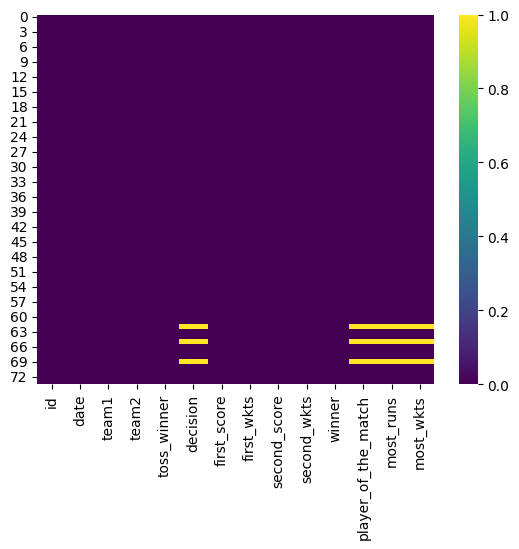

In [27]:
sns.heatmap(df.isnull(), cmap="viridis")
plt.xticks(rotation=90)
plt.show()

In [28]:
df.columns

Index(['id', 'date', 'team1', 'team2', 'toss_winner', 'decision',
       'first_score', 'first_wkts', 'second_score', 'second_wkts', 'winner',
       'player_of_the_match', 'most_runs', 'most_wkts'],
      dtype='object')

In [29]:
df["decision"].unique()

array(['Bat', 'Field', nan], dtype=object)

In [30]:
df[df.isnull().any(axis=1)]

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
62,63,"May 13,2024",Gujarat,Kolkata,No Toss,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
65,66,"May 16,2024",Hyderabad,Gujarat,No Toss,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
69,70,"May 19,2024",Rajasthan,Kolkata,Kolkata,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN


In [31]:
df.drop([62,65,69],axis=0, inplace= True)

In [32]:
df.isnull().sum()

id                     0
date                   0
team1                  0
team2                  0
toss_winner            0
decision               0
first_score            0
first_wkts             0
second_score           0
second_wkts            0
winner                 0
player_of_the_match    0
most_runs              0
most_wkts              0
dtype: int64

<Axes: >

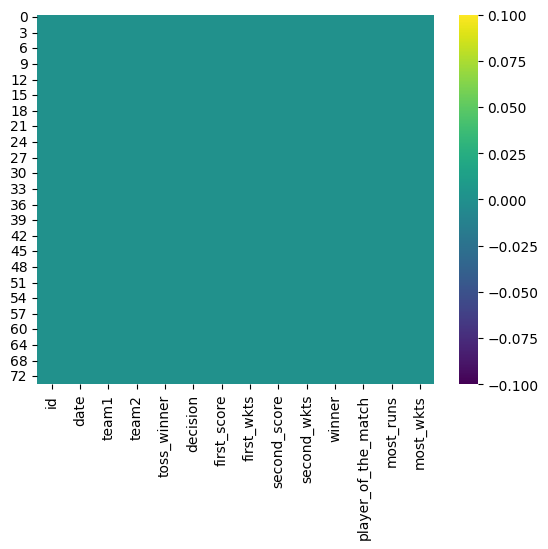

In [33]:
sns.heatmap(df.isnull(), cmap= "viridis")

# VISUALIZATION

In [34]:
df1=df["winner"].value_counts()
df1

winner
Kolkata      11
Rajasthan     9
Hyderabad     9
Chennai       7
Banglore      7
Lucknow       7
Delhi         7
Punjab        5
Gujarat       5
Mumbai        4
Name: count, dtype: int64

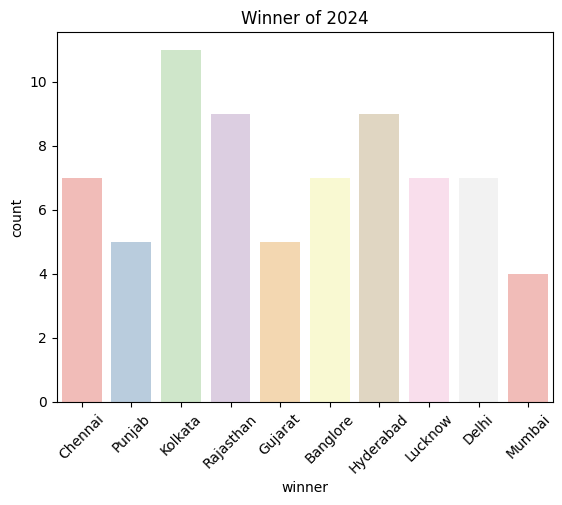

In [36]:
sns.countplot(data=df,x= "winner",palette="Pastel1")
plt.xticks(rotation=45)
plt.title("Winner of 2024")
plt.show()

In [37]:
df["toss_winner"].value_counts()

toss_winner
Rajasthan    11
Punjab       10
Mumbai       10
Lucknow       9
Banglore      8
Hyderabad     7
Delhi         7
Gujarat       3
Kolkata       3
Chennai       3
Name: count, dtype: int64

In [38]:
df.shape

(71, 14)

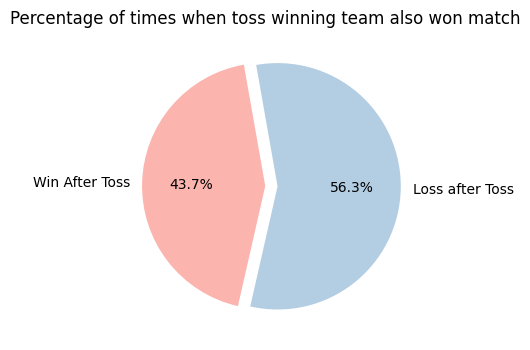

In [41]:
W=np.sum(df["toss_winner"]==df["winner"])
L=len(df)-W
P= W/len(df)*100

plt.figure(figsize=(6,4))
colors=sns.color_palette("Pastel1")
plt.pie([W,L],labels=["Win After Toss","Loss after Toss"], autopct="%1.1f%%",colors=colors, explode=(0,0.1), startangle= 100)
plt.title("Percentage of times when toss winning team also won match")
plt.show()

In [48]:
won1=df[(df["first_score"]>df["second_score"]) & (df["decision"]=="Bat")]
df3=won1["winner"].value_counts().sum()
df3

7

In [49]:
won2=df[(df["first_score"]>df["second_score"]) & (df["decision"]=="Field")]
df4=won2["winner"].value_counts().sum()
df4

27

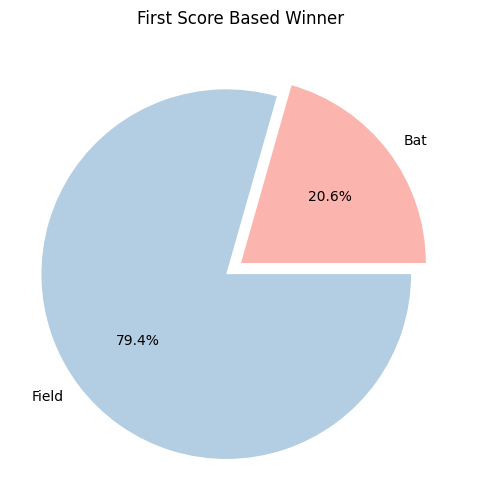

In [51]:
plt.figure(figsize=(6,6))
colors=sns.color_palette("Pastel1")
plt.pie([df3,df4], labels=["Bat","Field"], autopct="%1.1f%%", colors=colors,explode=[0,0.1])
plt.title("First Score Based Winner")
plt.show()

In [54]:
won3=df[(df["first_score"]< df["second_score"]) & (df["decision"]=="Bat")]
df5=won3["winner"].value_counts().sum()
df5

12

In [59]:
won4=df[(df["first_score"]< df["second_score"]) & (df["decision"]=="Field")]
df6=won4["winner"].value_counts().sum()
df6


25

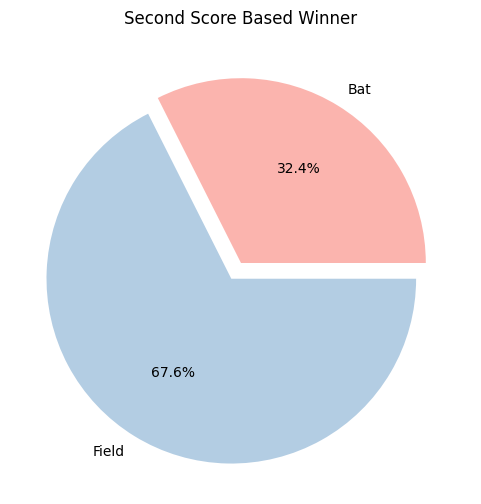

In [61]:
plt.figure(figsize=(6,6))
colors=sns.color_palette("Pastel1")
plt.pie([df5,df6], labels=["Bat","Field"], autopct="%1.1f%%", colors=colors,explode=[0,0.1])
plt.title("Second Score Based Winner")
plt.show()

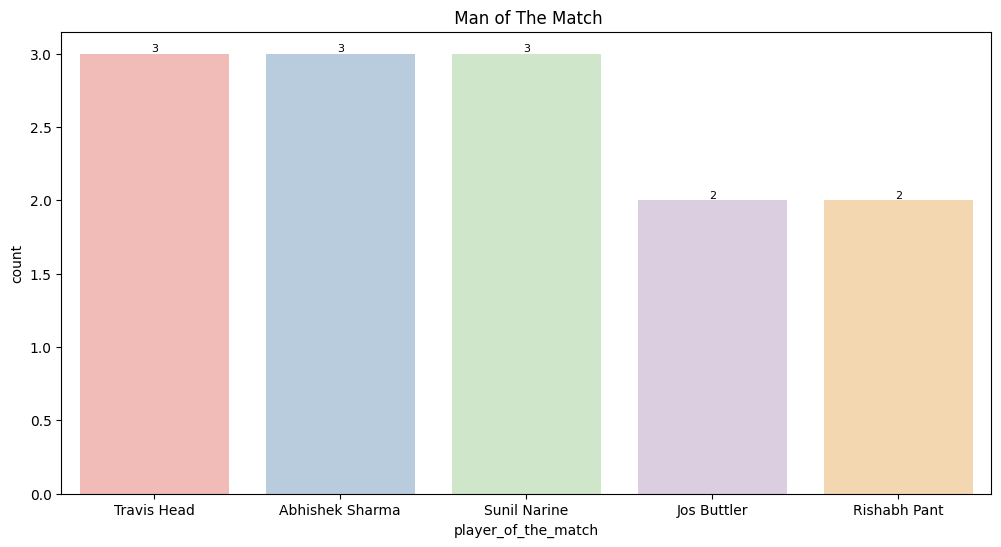

In [73]:
top5=df["player_of_the_match"].value_counts().nlargest(5).index
filter_df=df[df["player_of_the_match"].isin(top5)]

plt.figure(figsize=(12,6))
ax=sns.countplot(data=filter_df, x="player_of_the_match",palette="Pastel1", order=top5)
for container in ax.containers:
    ax.bar_label(container, size=8, padding=0.2)
plt.title(" Man of The Match")
plt.show()

In [74]:
df.to_csv("ipl.csv", index=False)